In [3]:
#import librabries
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as npy
df = pd.read_csv('house_pricing_dataset.csv')
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

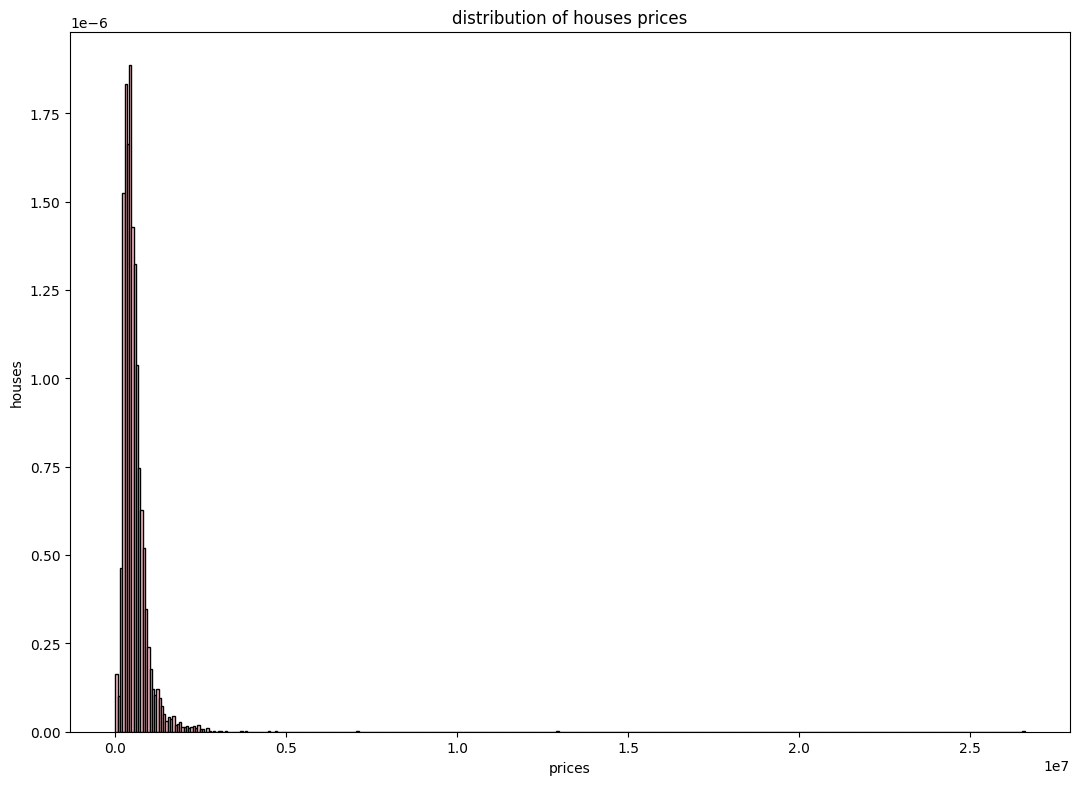

In [5]:
#distribution of house prices using a histogram
fig = plt.figure(figsize=(10,7))
his=fig.add_axes([0,0,1,1])
plt.hist(df['price'], density = True, color = 'pink', edgecolor = 'black', bins=400)
plt.xlabel('prices')
plt.ylabel('houses')
plt.title('distribution of houses prices')
plt.savefig('Distribution_of_house_prices.png')
plt.show()

In [3]:
#Average house prices across the top 10 cities
avg = df.groupby('city')['price'].mean()
city = avg.sort_values(ascending=False)
avgprice_topcity=city.head(10)
avgprice_topcity

city
Medina                2.046559e+06
Clyde Hill            1.321945e+06
Yarrow Point          1.194838e+06
Mercer Island         1.123818e+06
Bellevue              8.471807e+05
Beaux Arts Village    7.450000e+05
Fall City             6.926818e+05
Sammamish             6.869176e+05
Redmond               6.676495e+05
Newcastle             6.660467e+05
Name: price, dtype: float64

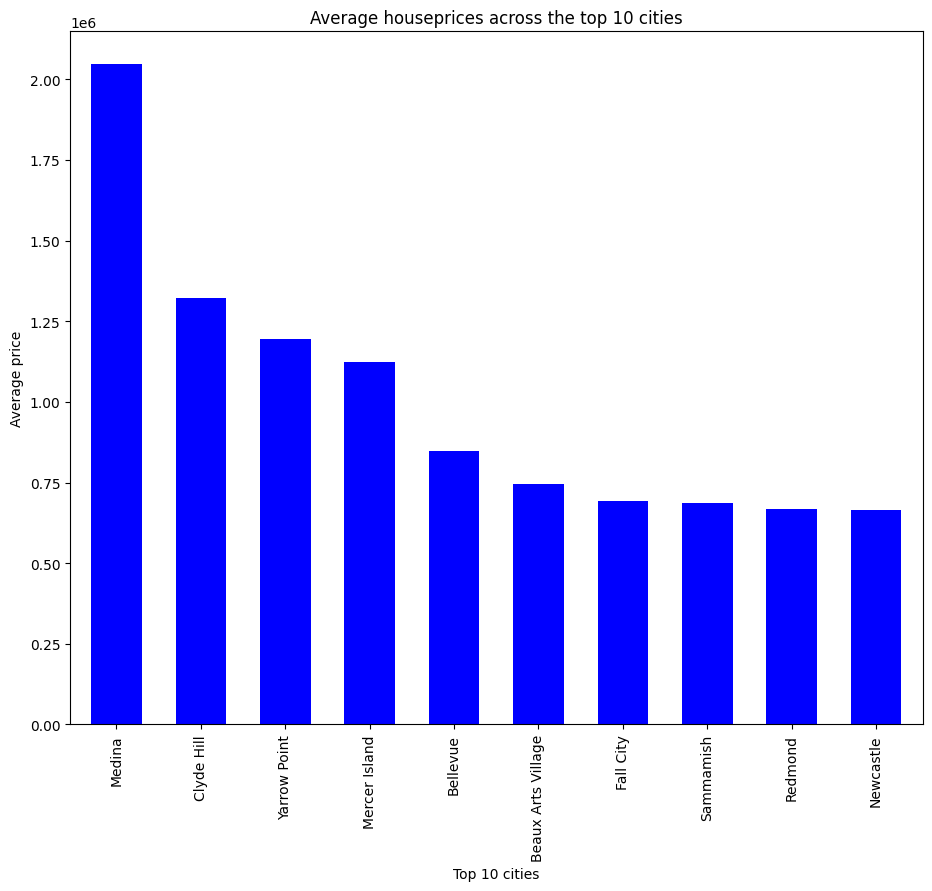

In [5]:
#distribution of house prices across the top 10 cities, using bar chart
fig = plt.figure(figsize=(11,9))
avgprice_topcity.plot(kind = 'bar', width=0.6, color = 'blue')
plt.xlabel('Top 10 cities')
plt.ylabel('Average price')
plt.title('Average houseprices across the top 10 cities')
plt.savefig('Average_house_prices_across_the_top_10_cities.png')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

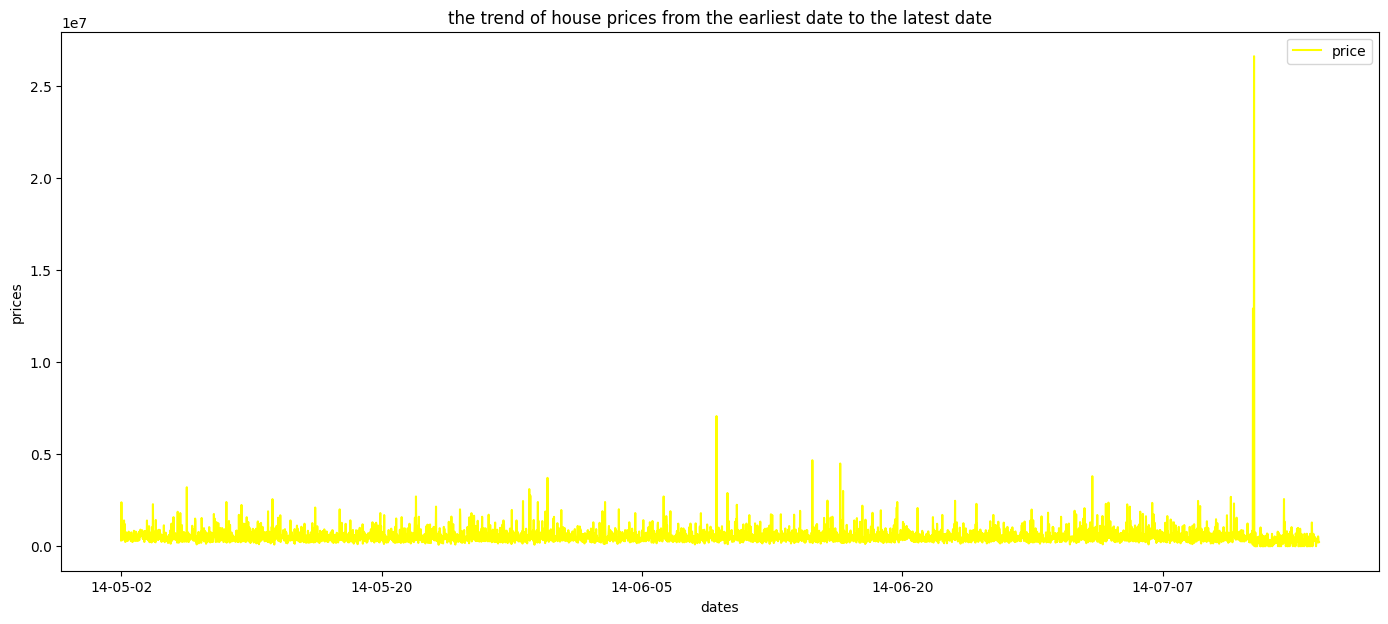

In [8]:
#the trend of house prices from the earliest date to the latest date in the dataset
df['date_time'] = pd.to_datetime(df['date'])
df['date_time'] = pd.to_datetime(df.date_time).dt.strftime('%y-%m-%d')
df.plot(x='date_time', y='price', color='yellow', figsize = (17,7))
plt.legend(loc = 'upper right')
plt.xlabel('dates')
plt.ylabel('prices')
plt.title('the trend of house prices from the earliest date to the latest date')
plt.savefig('The_trend_of_house_prices_from_the_earliest_date_to_the_latest_date.png')
plt.show

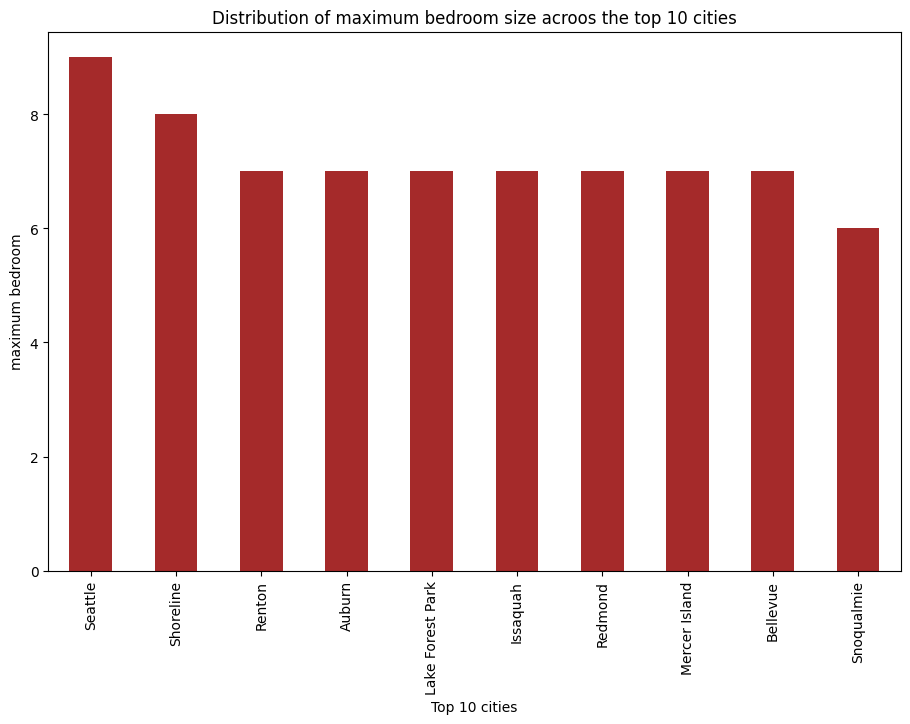

In [10]:
#distribution of maximum bedroom size across the top 10 cities, using bar chart
max = df.groupby('city')['bedrooms'].max()
max_bedroom = max.sort_values(ascending=False)
bedmax_topcity = max_bedroom.head(10)
fig = plt.figure(figsize=(11,7))
bedmax_topcity.plot(kind = 'bar', color = "brown", width = 0.5)
plt.xlabel('Top 10 cities')
plt.ylabel('maximum bedroom')
plt.title('Distribution of maximum bedroom size acroos the top 10 cities')
plt.savefig('Distribution_of_maximum_bedroom_size_acroos_the_top_10_cities.png')
plt.show()

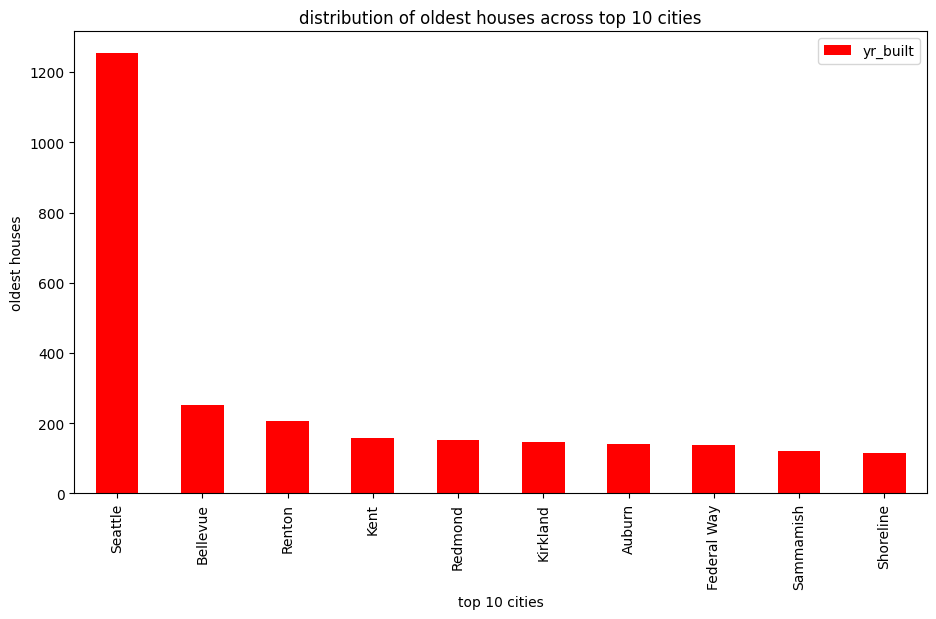

In [12]:
#distribution of oldest houses across top 10 cities, using the chart
oldest_houses = df.loc[df['yr_built']< 2000]
top_oldest = oldest_houses.groupby('city')['yr_built'].count()
oldest = top_oldest.sort_values(ascending=False)
oldest_topcity = oldest.head(10)
fig=plt.figure(figsize=(11,6))
oldest_topcity.plot(kind ='bar', color = 'red', width = 0.5)
plt.legend(loc = 'upper right')
plt.xlabel('top 10 cities')
plt.ylabel('oldest houses')
plt.title('distribution of oldest houses across top 10 cities')
plt.savefig('Distribution_of_oldest_houses_across_top_10_cities.png')
plt.show()

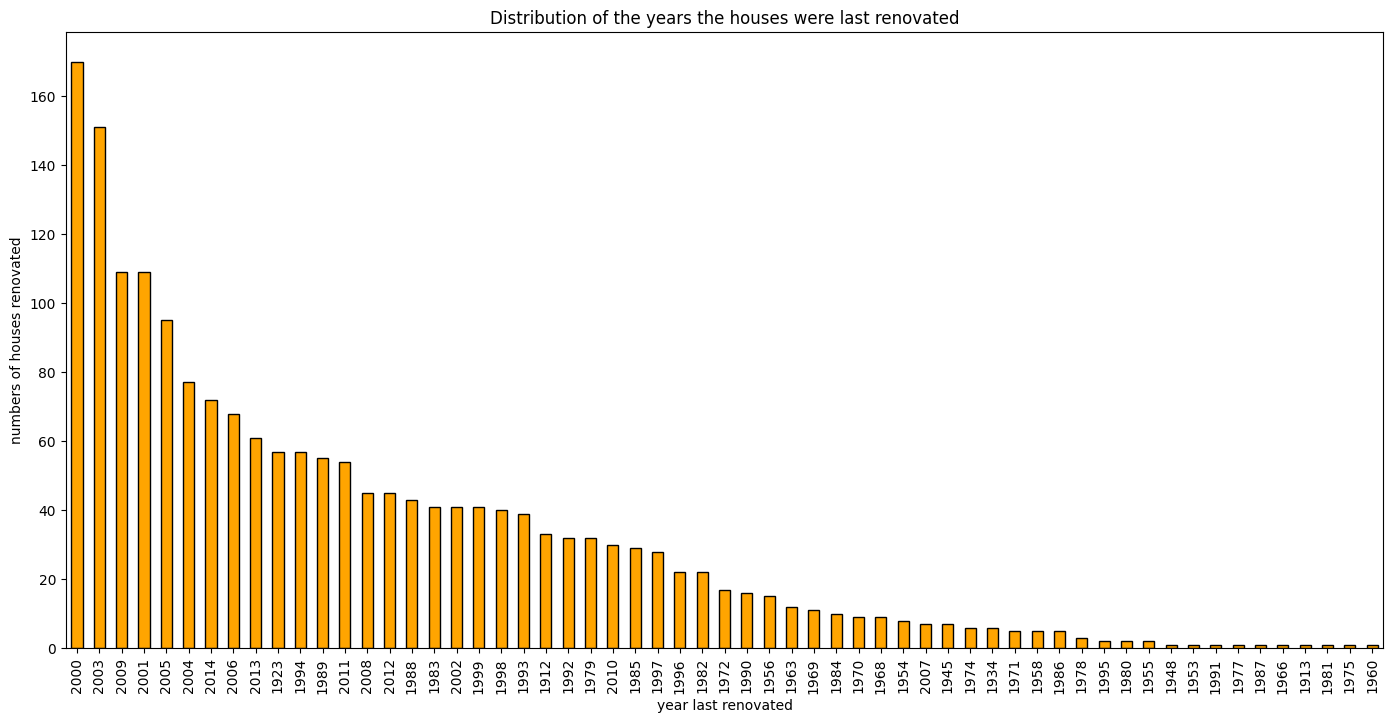

In [16]:
#distribution of the years the house were last renovated, using bar chart
house_last_renovated = df.loc[df['yr_renovated']!=0].reset_index()
count_house = house_last_renovated.groupby('yr_renovated')['country'].count()
yr_renovated = count_house.sort_values(ascending=False)
fig = plt.figure(figsize=(17,8))
yr_renovated.plot(kind = 'bar', color = 'orange', edgecolor = 'black', width=0.5)
plt.xlabel('year last renovated')
plt.ylabel('numbers of houses renovated')
plt.title('Distribution of the years the houses were last renovated')
plt.savefig('Distribution_of_the_years_the_houses_were_last_renovated.png')
plt.show()

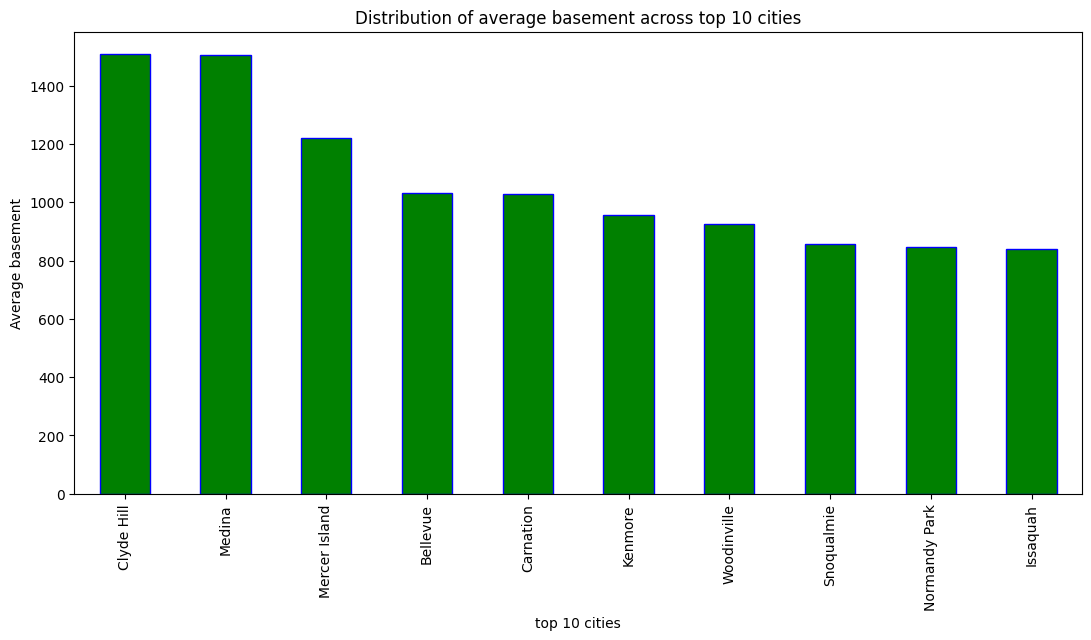

In [17]:
#distribution of average basement square feets across top 10 cities, using bar chart
square_ft = df.loc[df['sqft_basement']!=0]
top_square_ft = square_ft.groupby('city')['sqft_basement'].mean()
square_ft_avg = top_square_ft.sort_values(ascending=False)
avg_square_ft = square_ft_avg.head(10)
fig = plt.figure(figsize=(13,6))
avg_square_ft.plot(kind = 'bar', color = 'green', edgecolor = 'blue', width=0.5)
plt.xlabel('top 10 cities')
plt.ylabel('Average basement')
plt.title('Distribution of average basement across top 10 cities')
plt.savefig('Distribution_of_average_basement_across_top_10_cities.png')
plt.show()


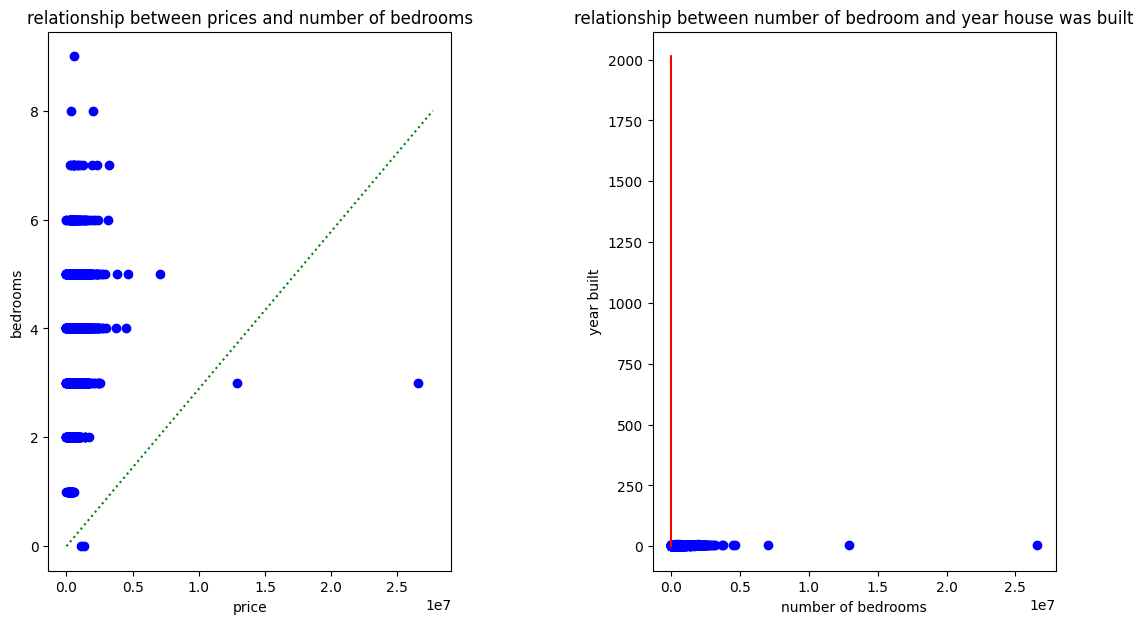

In [18]:
#the relationship between prices and number of bedrooms, using scatter plot
fig,((ax1, ax2))=plt.subplots(nrows=1,ncols=2,figsize=(13,7))
x=[0, 27680000]
y=[0,8]
x1=df['price']
y1=df['bedrooms']

ax1.scatter(x1,y1, color ='blue')
ax1.plot(x,y, color='green', linestyle=':')
ax1.set_xlabel('price')
ax1.set_ylabel('bedrooms')
ax1.set_title('relationship between prices and number of bedrooms')
plt.savefig('Relationship_between_prices_and_number_of_bedrooms.png')
plt.subplots_adjust(wspace=0.5, hspace=0.5)

#relationship between number of bedrooms and year the house was built, using scatter plot
x=[0,8]
y=[0,2014]
x2=df['price']
y2=df['bedrooms']

ax2.scatter(x1,y1, color ='blue')
ax2.plot(x,y, color='red', linestyle='-')
ax2.set_xlabel('number of bedrooms')
ax2.set_ylabel('year built')
ax2.set_title('relationship between number of bedroom and year house was built')
plt.savefig('Relationship_between_number_of_bedroom_and_year_house_was_built.png')
plt.subplots_adjust(wspace=0.5, hspace=0.5)